<a href="https://colab.research.google.com/github/linejin/ai_study/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#@title hidden setting code {display-mode: "form"}

#@markdown 이 부분을 실행시켜주세요{display-mode: "form"}

# This document is made by Choi Sejin



# This code will be hidden when the notebook is loaded.
!pip install --upgrade -q gspread


# using for google sheet
"""
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

# Open our new sheet and read some data.
worksheet = gc.open('A new spreadsheet').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
pd.DataFrame.from_records(rows)
"""
!git clone https://github.com/linejin/ai_study
print("Cloneing Ready")



fatal: destination path 'ai_study' already exists and is not an empty directory.
Cloneing Ready


# Pytorch 설치

#####설치 pip

In [ ]:
pip install torch torchvision

##### 설치 확인

Pytorch 공식 예제

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np

# N은 배치 크기이며, D_in은 입력의 차원입니다;
# H는 은닉층의 차원이며, D_out은 출력 차원입니다.
N, D_in, H, D_out = 64, 1000, 100, 10

# 무작위의 입력과 출력 데이터를 생성합니다.
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# 무작위로 가중치를 초기화합니다.
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    # 순전파 단계: 예측값 y를 계산합니다.
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # 손실(loss)을 계산하고 출력합니다.
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # 손실에 따른 w1, w2의 변화도를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # 가중치를 갱신합니다.
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 27420836.067170322
1 24742876.477994043
2 25245840.673540756
3 25377385.669135034
4 23038144.006690674
5 17915811.955479022
6 12019128.576162428
7 7198946.712146653
8 4129630.472030341
9 2406687.4073465317
10 1499586.7092761493
11 1017773.0580460045
12 749514.0928742538
13 587844.6023218754
14 481412.5350871524
15 405278.89119220106
16 347154.76175962394
17 300801.44742884726
18 262737.2864617693
19 230873.46432148115
20 203803.10023943655
21 180648.76730663766
22 160696.90565660043
23 143405.75859170136
24 128329.88671575609
25 115115.51171794871
26 103524.01159643452
27 93302.59809025038
28 84267.43939033899
29 76244.84327684119
30 69100.90544068668
31 62724.25011386712
32 57019.8450735562
33 51906.43939944025
34 47315.52887947372
35 43189.81756233929
36 39468.5216316899
37 36109.282480241396
38 33070.54521694282
39 30319.049267053324
40 27823.19933964543
41 25556.664550391022
42 23495.417012550177
43 21618.745870755098
44 19908.061316105915
45 18348.056603308913
46 16922.421970506

In [ ]:
# -*- coding: utf-8 -*-

import torch


dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU에서 실행하려면 이 주석을 제거하세요.

# N은 배치 크기이며, D_in은 입력의 차원입니다;
# H는 은닉 계층의 차원이며, D_out은 출력 차원입니다:
N, D_in, H, D_out = 64, 1000, 100, 10

# 무작위의 입력과 출력 데이터를 생성합니다.
x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

# 무작위로 가중치를 초기화합니다.
w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6
for t in range(500):
    # 순전파 단계: 예측값 y를 계산합니다.
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # 손실(loss)을 계산하고 출력합니다.
    loss = (y_pred - y).pow(2).sum()
    print(t, loss)

    # 손실에 따른 w1, w2의 변화도를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # 경사하강법(Gradient Descent)를 사용하여 가중치를 갱신합니다.
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

# 참고 자료

Pytorch 공식 문서 https://tutorials.pytorch.kr/beginner/blitz/tensor_tutorial.html

Pytorch 딥러닝 입문 https://wikidocs.net/53383

# K-Nearest Neighbors


KNN은 어떤 데이터에 대한 예측, 판단을 그 데이터와 가장 유사한 K개의 데이터를 보고 판단

거리를 비교하여 가까울수록 유사함

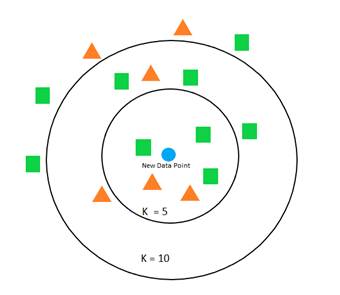

위 그림은 파란점에 대하여 분류


k = 5 : 초록색 사각형

####예시



1.영화 분류 

Romantic과 Action에서의 Hug count와 Kick count

 -  오각형 : Romantic

 - 삼각형 : Action

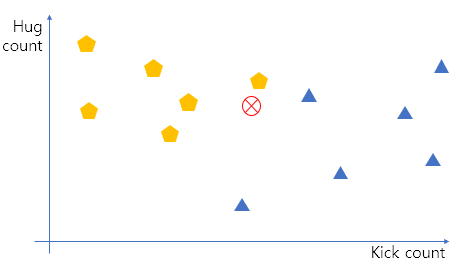

> 그래프를 그릴 때, 축들은 하나의 자료를 나타내는 parameter

위 그림에서는 Hug count와 Kick count가 축이 됨

####**거리 계산 방법**

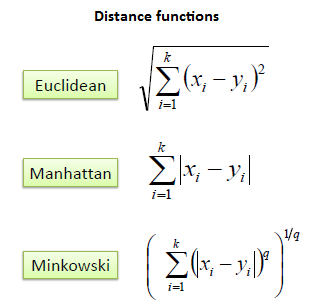

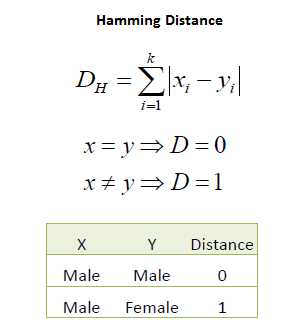


- hamming disttance : bit단위 거리

> 거리 계산식은 상황에 따라 적합한 것을 고른다.

#####Norm

Vector의 크기를 구하는 방법(두 점사이의 거리)

1. L1 Norm : Manhattan
2. L2 Norm(Frobenius Norm) : Uclidean 
3. 

#### 정규화



Kick은 Hug에 비하여 어떤 장르의 영화에서든 자주 나온다.

따라서 Kick count가 1 만큼 차이나는 것 보다 Hug count가 1 만큼 차이나는 것이 더 영향력 있다.

정규화를 거치지 않고 그냥 거리를 계산할 경우 이러한 점을 고려하지 않게 되고, Kick count의 거리 1 과 Hug count의 거리 1 이 동일한 영향을 끼친다.

> 이를 보정해주는 것이 **정규화**이다.



##### 기본 정규화 식


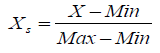

해당 축 값의 (최솟값 ~ 최댓값)을 비율 값으로 나타내는 방법

# KNN practice

## 구현순서

1. csv파일 호출

    * 일부 데이터는 학습, 나머지는 학습된 결과를 확인하기 위해 사용


2. INPUT 값과 Label값 분리

    * 계산을 위한 값과 그 결과에 해당하는 값으로 분리


3. Train용 DATA와 Test용 DATA 선별

    * Train : 판단하는 기준이 될 DATA

    * Test : 정확도 계산을 위해 Train을 활용해볼 DATA

4. TestDATA 중 하나를 골라 모든 TrainDATA와 거리값 계산

5. 해당 거리를 정렬하여 가장 가까운 K개의 DATA에서 가장 많은 Label 선택

## Python으로 직접 구현

####**csv 불러오기**



pandas를 활용하여 csv 호출

pandas.dropna()를 활용하여 비어있는 데이터 삭제

> Grade.csv


| |Language|Math|  English | Programming| Grade|
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|0|38|34|78|39|F|
|1|61|20|17|31|F|
|2|87|70|62|42|C|
|3|61|60|64|96|B|
|4|93|21|97|72|B|


In [ ]:
import io
import pandas as pd
import numpy as np
from google.colab import files

# target 될 라벨명 및 csv에서 활용할 데이터 크기 설정
Label_name = "Grade"
DATA_SIZE = 3000

data = pd.read_csv('/content/ai_study/testcase/Grade.csv')
print(data.head())
data = data.dropna().head(DATA_SIZE)
print(data)

   Language  Math  English  Programming Grade
0        38    34       78           39     F
1        61    20       17           31     F
2        87    70       62           42     C
3        61    60       64           96     B
4        93    21       97           72     B
      Language  Math  English  Programming Grade
0           38    34       78           39     F
1           61    20       17           31     F
2           87    70       62           42     C
3           61    60       64           96     B
4           93    21       97           72     B
...        ...   ...      ...          ...   ...
2995         8    66       48           53     F
2996        41    43       58           39     F
2997        78     8       11           74     F
2998        12    65       98           73     C
2999        47    24       83           52     D

[3000 rows x 5 columns]


####**결과값 mapping table 만들기**

Label의 데이터들을 숫자로 만들기 위한 table 생성



mapping : label to number

reverse_mapping : number to label

> mapping = {'F': 0, 'C': 1, 'B': 2, 'D': 3, 'A': 4}
>
> reverse_mapping = {0: 'F', 1: 'C', 2: 'B', 3: 'D', 4: 'A'}



In [ ]:
mapping = {}
reverse_mapping = {}
cnt_category = 0
for x in pd.Series(data[Label_name].values).drop_duplicates() :
  mapping[x] = cnt_category
  reverse_mapping[cnt_category] = x
  cnt_category += 1
print(mapping)
print(reverse_mapping)

{'F': 0, 'C': 1, 'B': 2, 'D': 3, 'A': 4}
{0: 'F', 1: 'C', 2: 'B', 3: 'D', 4: 'A'}


####**DATA를 INPUT값과 OUTPUT값으로 분리**

계산을 위한 INPUT에 해당하는 부분과 그 결과에 해당하는 OUTPUT값(Label)으로 분리

> INPUT : [[38. 34. 78. 39.] ... ]
>
> OUTPUT : [0. 0. 1. ... 0. 1. 3.]


In [ ]:

# running split function on our dataset
X = data.drop(Label_name, axis = 1).values.astype(np.float64)[:DATA_SIZE]
Y = data[Label_name].apply(lambda x: mapping[x]).astype(np.float64).values[:DATA_SIZE]

print(X)
print(Y)

[[38. 34. 78. 39.]
 [61. 20. 17. 31.]
 [87. 70. 62. 42.]
 ...
 [78.  8. 11. 74.]
 [12. 65. 98. 73.]
 [47. 24. 83. 52.]]
[0. 0. 1. ... 0. 1. 3.]


####**학습용 DATA와 테스트용 DATA를 랜덤하게 선별**



> train_test_split(INPUT,  OUPUT,  train : test 비율)

|train_features|train_target|test_features|test_target|
|:--------:|:--------:|:--------:|:--------:|
|train_input|train_output|test_input|test_output|




In [ ]:
def train_test_split(features, target, test_size = 0.2):
    """Splits dataset into training and testing sets.
    
    Args- 
        features- The feature matrix of the dataset (numpy array)
        target- The target array (numpy array)
        test_size- Size of test dataset that you want
    
    Returns-
        train_features, train_target, test_features, test_target 
    """
    num_total_rows = features.shape[0] # total rows in the dataset
    num_test_rows = np.round(num_total_rows * test_size) # total rows in testing dataset

    # recommand to change seed value
    np.random.seed(8)
    rand_row_num = np.random.randint(0, int(num_total_rows), int(num_test_rows)) # randomly generated row numbers

    # train and test features

    test_features = np.array([features[i] for i in rand_row_num]) # creates test feature set
    train_features = np.delete(features, rand_row_num, axis = 0) # deletes test data rows from main dataset; making it training dataset

    # train and test target
    test_target = np.array([target[i] for i in rand_row_num]) # creates test target set
    train_target = np.delete(target, rand_row_num, axis = 0) # creates training target set

    return train_features, train_target, test_features, test_target 

train : test = 8 : 2  비율로 선별

In [ ]:
X_train, X_target, Y_train, Y_target = train_test_split(X, Y, test_size = 0.2)

# printing the shape of the splits
print(X_train.shape, X_target.shape, Y_train.shape, Y_target.shape)
print(X_train)

(2458, 4) (2458,) (600, 4) (600,)
[[38. 34. 78. 39.]
 [61. 20. 17. 31.]
 [93. 21. 97. 72.]
 ...
 [78.  8. 11. 74.]
 [12. 65. 98. 73.]
 [47. 24. 83. 52.]]


####**거리 계산 함수**

Euclide distance

In [ ]:
def distance(row1, row2):
  return np.sqrt(np.sum((row1 - row2) ** 2))


####**K-Nearest neighbor**

nomalize 없이

In [ ]:
from collections import Counter

k = 3
cnt = 0

# select index in test_data
for Y_index in range(len(Y_train)) :
  distances = []

  # calculate distance from test_data to train_data
  # add distance to list named distances
  for i in X_train :
    dist = distance(i, Y_train[Y_index])
    distances.append(dist)
  
  # sort index by distances
  sorted_index_toDistance = np.argsort(distances)

  # find target name by most nearest data in sorted_index_toDistance
  nearest_index = []
  for j in sorted_index_toDistance[:k] :
    nearest_index.append(X_target[j])
  result, result_count = Counter(nearest_index).most_common(1)[0]

  # counting Correct
  if(result == Y_target[Y_index]) :
    cnt+=1
    print("Correct")
  else :
    print("Wrong")
    print("Guess : ", reverse_mapping[result])
  print(Y_train[Y_index],":",reverse_mapping[Y_target[Y_index]])


# printing the result
print("cnt : ", cnt)
print("Correct percent : ", cnt / len(Y_train) * 100, "%")

Correct
[56. 65. 14. 18.] : F
Correct
[29. 35.  6. 13.] : F
Correct
[26. 89. 67. 76.] : C
Correct
[67. 87. 83. 25.] : C
Wrong
Guess :  D
[78. 14. 36. 64.] : F
Correct
[38.  5.  9. 68.] : F
Correct
[23. 98. 15. 52.] : F
Correct
[49. 85. 63. 30.] : D
Correct
[98. 30.  3.  1.] : F
Correct
[15. 23. 77. 79.] : F
Correct
[20. 68. 61.  3.] : F
Correct
[46. 13. 14. 86.] : F
Correct
[79.  5. 55. 15.] : F
Correct
[68.  7. 23. 63.] : F
Correct
[33. 93.  4. 30.] : F
Correct
[59. 57. 93.  8.] : D
Correct
[90. 87. 30. 58.] : C
Correct
[33. 78.  0. 51.] : F
Wrong
Guess :  C
[89. 73.  4. 66.] : D
Correct
[ 5. 40. 83. 21.] : F
Correct
[36. 64. 43. 75.] : D
Wrong
Guess :  F
[52. 86. 40. 31.] : D
Correct
[71. 90. 89. 55.] : B
Wrong
Guess :  C
[77. 99. 58.  3.] : D
Correct
[30. 39. 13. 36.] : F
Correct
[79. 48. 11. 50.] : F
Correct
[21. 50. 84. 67.] : D
Correct
[100.  71.   4.  32.] : D
Correct
[31. 40. 58. 81.] : D
Correct
[56. 84. 48. 87.] : C
Wrong
Guess :  D
[62. 59. 81. 46.] : C
Correct
[61. 12. 18. 

####**DATA 정규화**

distance를 계산하는 축들의 가중치가 같지 않기에 이를 맞춰주기 위한 처리

아래의 코드는 최댓값과 최소값 사이의 백분율로 계산

In [ ]:
def nomalization1(train, test) :
  max_value = np.array(train.max(axis = 0))
  min_value = np.array(train.min(axis = 0))
  temp_train = (np.array(train) - min_value) / (max_value - min_value)
  temp_test = (np.array(test) - min_value) / (max_value - min_value)
  return temp_train, temp_test

print("Befor")
print(X_train)
print(Y_train)
X_train, Y_train = nomalization1(X_train, Y_train)
print("After")
print(X_train)
print(Y_train)

Befor
[[ 62.   172.72]
 [ 59.   167.64]
 [ 62.   172.72]
 ...
 [ 77.   170.18]
 [ 61.   170.18]
 [ 61.   172.72]]
[[ 86.   160.02]
 [ 61.   162.56]
 [ 63.   177.8 ]
 ...
 [ 58.   165.1 ]
 [ 49.   162.56]
 [ 63.   177.8 ]]
After
[[0.26829268 0.63157895]
 [0.23170732 0.52631579]
 [0.26829268 0.63157895]
 ...
 [0.45121951 0.57894737]
 [0.25609756 0.57894737]
 [0.25609756 0.63157895]]
[[0.56097561 0.36842105]
 [0.25609756 0.42105263]
 [0.2804878  0.73684211]
 ...
 [0.2195122  0.47368421]
 [0.1097561  0.42105263]
 [0.2804878  0.73684211]]


#####정규화 후 KNN

In [ ]:
from collections import Counter

k = 3
cnt = 0

# select index in test_data
for Y_index in range(len(Y_train)) :
  distances = []

  # calculate distance from test_data to train_data
  # add distance to list named distances
  for i in X_train :
    dist = distance(i, Y_train[Y_index])
    distances.append(dist)
  
  # sort index by distances
  sorted_index_toDistance = np.argsort(distances)

  # find target name by most nearest data in sorted_index_toDistance
  nearest_index = []
  for j in sorted_index_toDistance[:k] :
    nearest_index.append(X_target[j])
  result, result_count = Counter(nearest_index).most_common(1)[0]

  # counting Correct
  if(result == Y_target[Y_index]) :
    cnt+=1
"""
    print("Correct")
  else :
    print("Wrong")
    print("Guess : ", reverse_mapping[result])
  print(Y_train[Y_index],":",reverse_mapping[Y_target[Y_index]])
"""

# printing the result
print("cnt : ", cnt)
print("Correct percent : ", cnt / len(Y_train) * 100, "%")

cnt :  533
Correct percent :  88.83333333333333 %


## Pytorch로 구현

In [6]:
#@title Python으로 직접 구현과 동일한 부분 {display-mode: "form"}


#-------csv 불러오기
import io
import pandas as pd
import numpy as np
from google.colab import files

# target 될 라벨명 및 csv에서 활용할 데이터 크기 설정
Label_name = "Grade"
DATA_SIZE = 3000
data = pd.read_csv('/content/ai_study/testcase/Grade.csv')
data = data.dropna().head(DATA_SIZE)

#-------mappnig table 만들기
mapping = {}
reverse_mapping = {}
cnt_category = 0
for x in pd.Series(data[Label_name].values).drop_duplicates() :
  mapping[x] = cnt_category
  reverse_mapping[cnt_category] = x
  cnt_category += 1

#-------INPUT, OUTPUT 분리
X = data.drop(Label_name, axis = 1).values.astype(np.float64)[:DATA_SIZE]
Y = data[Label_name].apply(lambda x: mapping[x]).astype(np.float64).values[:DATA_SIZE]

#-------train, test 선별
def train_test_split(features, target, test_size = 0.2):
    """Splits dataset into training and testing sets.
    
    Args- 
        features- The feature matrix of the dataset (numpy array)
        target- The target array (numpy array)
        test_size- Size of test dataset that you want
    
    Returns-
        train_features, train_target, test_features, test_target 
    """
    num_total_rows = features.shape[0] # total rows in the dataset
    num_test_rows = np.round(num_total_rows * test_size) # total rows in testing dataset

    # recommand to change seed value
    np.random.seed(8)
    rand_row_num = np.random.randint(0, int(num_total_rows), int(num_test_rows)) # randomly generated row numbers

    # train and test features

    test_features = np.array([features[i] for i in rand_row_num]) # creates test feature set
    train_features = np.delete(features, rand_row_num, axis = 0) # deletes test data rows from main dataset; making it training dataset

    # train and test target
    test_target = np.array([target[i] for i in rand_row_num]) # creates test target set
    train_target = np.delete(target, rand_row_num, axis = 0) # creates training target set

    return train_features, train_target, test_features, test_target 

#--8:2 선별
X_train, X_target, Y_train, Y_target = train_test_split(X, Y, test_size = 0.2)




##### Convert INPUT DATA from numpy to torch 

In [ ]:
import torch

X_train, X_target, Y_train, Y_target

ori_data = torch.from_numpy(X_train)
test_data = torch.from_numpy(Y_train)
print("ori_Data")
print(ori_data)
print("test_Data")
print(test_data)

ori_Data
tensor([[38., 34., 78., 39.],
        [61., 20., 17., 31.],
        [93., 21., 97., 72.],
        ...,
        [78.,  8., 11., 74.],
        [12., 65., 98., 73.],
        [47., 24., 83., 52.]], dtype=torch.float64)
test_Data
tensor([[56., 65., 14., 18.],
        [29., 35.,  6., 13.],
        [26., 89., 67., 76.],
        ...,
        [96.,  0., 92., 86.],
        [29., 54., 87., 96.],
        [95., 25., 90., 39.]], dtype=torch.float64)


##### Calculate Distance

In [ ]:
dist = torch.norm(ori_data - test_data[0], dim=1)
print(dist)

dist
tensor([ 76.3020,  47.2017, 114.4989,  ...,  82.9337, 109.6221,  87.6299],
       dtype=torch.float64)


####Select Nearest

In [ ]:
knn = dist.topk(3, largest=False)
print('kNN dist: {}, index: {}'.format(knn.values, knn.indices))

kNN dist: tensor([ 7.9373, 10.5357, 11.5758], dtype=torch.float64), index: tensor([1770, 2413, 1867])


####Find the most label number and Restore label

In [ ]:
result = X_target[knn.indices.topk(1, largest=True).values]
for i in knn.indices:
  print(ori_data[i,:])
  print(reverse_mapping[X_target[i]])
print("Most label num : {}, Y_label num : {}".format(result, Y_target[0]))
if X_target[knn.indices.topk(1, largest=True).values] == Y_target[0] : 
  print("Correct")
else:
  print("Wrong")
print("Guess : ", reverse_mapping[result], "answer : ", reverse_mapping[Y_target[0]])

tensor([51., 70., 16., 15.], dtype=torch.float64)
F
tensor([55., 70., 20., 25.], dtype=torch.float64)
F
tensor([53., 54., 14., 20.], dtype=torch.float64)
F
Most label num : 0.0, Y_label num : 0.0
Correct
Guess :  F answer :  F


## scikit-learn을 활용하여 구현

###scikit-learn이란

ML을 위한 기본 기능을 제공하는 무료 라이브러리

* simple testdata 제공
* 각종 알고리즘이 사전에 구현
* 구현된 알고리즘은 동일한 방식으로 사용 가능

###csv 호출

In [ ]:
import pandas as pd
from google.colab import files

data = pd.read_csv('/content/ai_study/testcase/Grade.csv')
data = data.dropna().head(10000)
print(data)

      Language  Math  English  Programming Grade
0           38    34       78           39     F
1           61    20       17           31     F
2           87    70       62           42     C
3           61    60       64           96     B
4           93    21       97           72     B
...        ...   ...      ...          ...   ...
9995        71     6       37           71     F
9996        93    87       82           32     B
9997        60    41       43           70     D
9998         5    99       58           34     F
9999        77     0       50           84     D

[10000 rows x 5 columns]


###Train 및 Test DATA 분리

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, Y_train, X_test, Y_test = train_test_split(data.drop('Grade', axis = 1),data['Grade'], test_size = 0.2, shuffle = True)
print("--------X_train------", X_train, sep = "\n")
print("--------X_test-------", X_test, sep = "\n")
print("--------Y_train------", Y_train, sep = "\n")
print("--------Y_test-------", Y_test, sep = "\n")

--------X_train------
      Language  Math  English  Programming
4914        10    78       60           80
2142        96    21       87           88
9675        67    30       41           78
9796        81    31       12           70
44          81    78       51           60
...        ...   ...      ...          ...
6215        24    42       35           73
4410        72    55       45           55
1669        36    70       16           76
1610        42    85       26           51
5907        27    82       81           73

[8000 rows x 4 columns]
--------X_test-------
4914    D
2142    B
9675    D
9796    F
44      C
       ..
6215    F
4410    D
1669    F
1610    D
5907    C
Name: Grade, Length: 8000, dtype: object
--------Y_train------
      Language  Math  English  Programming
6966        93    86       76           71
246         91    71        7           15
5758        39    79       51           63
740          1    99       34           82
2760        98     0       

###KNN Classifier 사용

1. 알고리즘에 해당하는 class 생성
2. fit method를 활용해 학습
3. score method를 활용해 정확도 확인

In [ ]:
training_accuracy = []
test_accuracy = []

max_accuracy = 0
for i in range(1, 100, 2) :

  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train, X_test)
  one = clf.score(X_train, X_test)
  two = clf.score(Y_train, Y_test)
  print("Num of K : ", i)
  print("Train accuracy : ", one * 100)
  print("Test accuracy : " , two * 100)

Num of K :  1
Train accuracy :  100.0
Test accuracy :  91.60000000000001
Num of K :  3
Train accuracy :  96.8625
Test accuracy :  93.35
Num of K :  5
Train accuracy :  96.2125
Test accuracy :  93.4
Num of K :  7
Train accuracy :  95.6
Test accuracy :  93.60000000000001
Num of K :  9
Train accuracy :  95.6
Test accuracy :  93.89999999999999
Num of K :  11
Train accuracy :  95.45
Test accuracy :  93.89999999999999
Num of K :  13
Train accuracy :  95.4875
Test accuracy :  94.25
Num of K :  15
Train accuracy :  95.19999999999999
Test accuracy :  94.39999999999999
Num of K :  17
Train accuracy :  95.125
Test accuracy :  94.45
Num of K :  19
Train accuracy :  95.0125
Test accuracy :  94.39999999999999
Num of K :  21
Train accuracy :  94.9625
Test accuracy :  94.6
Num of K :  23
Train accuracy :  94.975
Test accuracy :  94.8
Num of K :  25
Train accuracy :  94.8
Test accuracy :  94.3
Num of K :  27
Train accuracy :  94.86250000000001
Test accuracy :  94.25
Num of K :  29
Train accuracy :  94.